In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_Other,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_cabbage stem,Item Name_caidian quinoa artemisia,Item Name_caixin,Item Name_caixin,Item Name_changxianqie,...,Item Name_zhijiang qinggengsanhua,Item Name_zhijiang red bolt,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
2228,1.000000,13.90,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
24062,1.000000,3.45,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12705,0.332571,7.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-01-16 21:33:11.311898: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-16 21:33:11.311914: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-16 21:33:11.311918: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-16 21:33:11.311943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-16 21:33:11.311954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([17228, 90]), TensorShape([5168, 90]), (2216, 90))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_Other,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_cabbage stem,Item Name_caidian quinoa artemisia,Item Name_caixin,Item Name_caixin,Item Name_changxianqie,...,Item Name_zhijiang qinggengsanhua,Item Name_zhijiang red bolt,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
1412,1.000000,3.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1445,0.428542,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
517,1.000000,13.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(90, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 90))) 
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/50


2024-01-16 21:33:24.555851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


539/539 [==============================] - 9s 15ms/step - loss: 0.4421 - mae: 0.4421 - val_loss: 0.3258 - val_mae: 0.3258
Epoch 2/50
539/539 [==============================] - 8s 14ms/step - loss: 0.2854 - mae: 0.2854 - val_loss: 0.2371 - val_mae: 0.2371
Epoch 3/50
539/539 [==============================] - 8s 14ms/step - loss: 0.2298 - mae: 0.2298 - val_loss: 0.2080 - val_mae: 0.2080
Epoch 4/50
539/539 [==============================] - 8s 14ms/step - loss: 0.2124 - mae: 0.2124 - val_loss: 0.1977 - val_mae: 0.1977
Epoch 5/50
539/539 [==============================] - 7s 14ms/step - loss: 0.2045 - mae: 0.2045 - val_loss: 0.1917 - val_mae: 0.1917
Epoch 6/50
539/539 [==============================] - 7s 14ms/step - loss: 0.1989 - mae: 0.1989 - val_loss: 0.1866 - val_mae: 0.1866
Epoch 7/50
539/539 [==============================] - 7s 14ms/step - loss: 0.1938 - mae: 0.1938 - val_loss: 0.1820 - val_mae: 0.1820
Epoch 8/50
539/539 [==============================] - 7s 14ms/step - loss: 0.188

In [8]:
import matplotlib.pyplot as plt

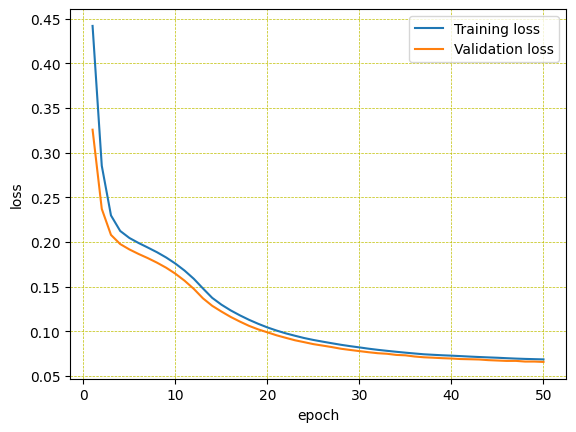

In [9]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training loss')
plt.plot(x_range, val_loss, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [16]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(90, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 90))) 
final_model.add(tf.keras.layers.LSTM(64, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 30

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/30
539/539 [==============================] - 10s 16ms/step - loss: 0.4474 - mae: 0.4474 - val_loss: 0.3538 - val_mae: 0.3538
Epoch 2/30
539/539 [==============================] - 8s 15ms/step - loss: 0.3147 - mae: 0.3147 - val_loss: 0.2659 - val_mae: 0.2659
Epoch 3/30
539/539 [==============================] - 8s 16ms/step - loss: 0.2498 - mae: 0.2498 - val_loss: 0.2198 - val_mae: 0.2198
Epoch 4/30
539/539 [==============================] - 8s 15ms/step - loss: 0.2201 - mae: 0.2201 - val_loss: 0.2027 - val_mae: 0.2027
Epoch 5/30
539/539 [==============================] - 8s 15ms/step - loss: 0.2087 - mae: 0.2087 - val_loss: 0.1950 - val_mae: 0.1950
Epoch 6/30
539/539 [==============================] - 8s 15ms/step - loss: 0.2022 - mae: 0.2022 - val_loss: 0.1895 - val_mae: 0.1895
Epoch 7/30
539/539 [==============================] - 8s 15ms/step - loss: 0.1970 - mae: 0.1970 - val_loss: 0.1852 - val_mae: 0.1852
Epoch 8/30
539/539 [==============================] - 8s 15ms/step -

In [17]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 90)                8190      
                                                                 
 reshape_2 (Reshape)         (None, 1, 90)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             39680     
                                                                 
 dense_7 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 57231 (223.56 KB)
Trainable params: 5723

In [18]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

70/70 [==============================] - 0s 7ms/step - loss: 0.0896 - mae: 0.0896


[0.08959148079156876, 0.08959148079156876]

In [19]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

70/70 [==============================] - 1s 5ms/step


array([[0.84368974],
       [0.20654385],
       [0.40435717],
       [0.20942755],
       [0.61023587]], dtype=float32)

In [20]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.        , 0.167     , 0.54485714, 0.1935    , 0.8912    ],
      dtype=float32)>

In [21]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
